In [45]:
from HW1def import *

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Exploration
Descriptions:
- <font color='green'>CLIENTNUM</font>: Unique identifier for the customer holding the account
- <font color='green'>Attrition_Flag</font>: Internal event (customer activity) variable (Existing = 1, Attrited = 0) [<font color='red'>Categorical</font>] [Output]
- <font color='green'>Customer_Age</font>: Customer's Age in Years [<font color='red'>Numerical</font>]
- <font color='green'>Gender</font>: (M = Male, F = Female) [<font color='red'>Categorical</font>]
- <font color='green'>Dependent_Count</font>: Number of dependents [<font color='red'>Numerical</font>]
- <font color='green'>Education_Level</font>: Educational Qualification of the account holder (Uneducated, High School, College, Graduate, Post-Graduate, Doctorate, Unknown) [<font color='red'>Categorical</font>]
- <font color='green'>Marital_Status</font>: (Married, Single, Divorced, Unknown) [<font color='red'>Categorical</font>] 
- <font color='green'>Income_Category</font>: Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >$120K) [<font color='red'>Categorical</font>] 
- <font color='green'>Card_Category</font>: Type of Card (Blue, Silver, Gold, Platinum)</font> [<font color='red'>Categorical</font>]
- <font color='green'>Months_on_book</font>: Period of relationship with bank [<font color='red'>Numerical</font>]
- <font color='green'>Total_Relationship_Count</font>: Total no. of products held by the customer [<font color='red'>Numerical</font>]
- <font color='green'>Months_Inactive_12_mon</font>: No. of months inactive in the last 12 months [<font color='red'>Numerical</font>]
- <font color='green'>Contacts_Count_12_mon</font>: No. of Contacts in the last 12 months [<font color='red'>Numerical</font>]
- <font color='green'>Credit_Limit</font>: Credit Limit on the Credit Card [<font color='red'>Numerical</font>]
- <font color='green'>Total_Revolving_Bal</font>: Total Revolving Balance on the Credit Card [<font color='red'>Numerical</font>]
- <font color='green'>Avg_Open_To_Buy</font>: Open to Buy Credit Line (Average of last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Amt_Chng_Q4_Q1</font>: Change in Transaction Amount (Q4 over Q1) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Trans_Amt</font>: Total Transaction Amount (Last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Trans_Ct</font>: Total Transaction Count (Last 12 months) [<font color='red'>Numerical</font>]
- <font color='green'>Total_Ct_Chng_Q4_Q1</font>: Change in Transaction Count (Q4 over Q1) [<font color='red'>Numerical</font>]
- <font color='green'>Avg_Utilization_Ratio</font>: Average Card Utilization Ratio [<font color='red'>Numerical</font>]

In [46]:
df = pd.read_csv('HWdata/credit_card_churn.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [47]:
df = df.drop(
['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
'CLIENTNUM'], axis=1)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [48]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Sort Columns (Numerical -> Categorical -> Output)

In [49]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,1:]

In [50]:
dfNum = df.select_dtypes(include=['int64', 'float64'])

In [51]:
dfOut = df.iloc[:,0:1]

In [52]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer' : 1,'Attrited Customer':0})
df

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,M,High School,Married,$60K - $80K,Blue,1
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,F,Graduate,Single,Less than $40K,Blue,1
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,M,Graduate,Married,$80K - $120K,Blue,1
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,F,High School,Unknown,Less than $40K,Blue,1
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,M,Uneducated,Married,$60K - $80K,Blue,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,M,Graduate,Single,$40K - $60K,Blue,1
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,M,Unknown,Divorced,$40K - $60K,Blue,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,F,High School,Married,Less than $40K,Blue,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,M,Graduate,Unknown,$40K - $60K,Blue,0


# Benchmark

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#get the dummy variables for the categorical variables
dfbm = pd.get_dummies(df)

xbm = dfbm.drop(['Attrition_Flag'], axis = 1)
ybm = dfbm['Attrition_Flag']

xbm_train,xbm_test,ybm_train,ybm_test = train_test_split(xbm,ybm,test_size = 0.2,random_state = 0)

clfbm = LogisticRegression()
clfbm.fit(xbm,ybm)
print("model score: %.8f" % clfbm.score(xbm_test, ybm_test))

model score: 0.87907206


C:\Users\mobil\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\mobil\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


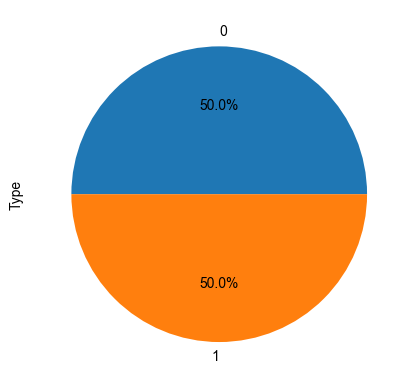

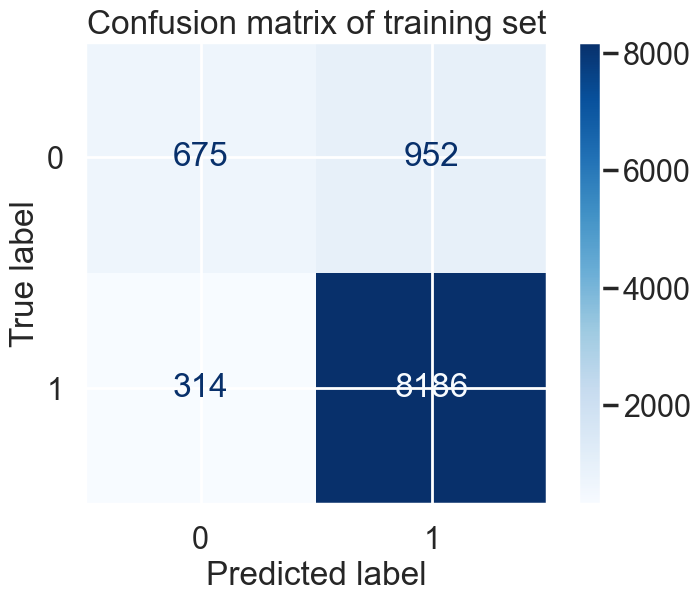

In [54]:
# Plot confusion matrix of training set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clfbm,
                      xbm,
                      ybm,
                      display_labels=list(set(ybm_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [55]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
ybm_pred = clfbm.predict(xbm)
print("Classification report \n=======================")
print(classification_report(y_true=ybm, y_pred=ybm_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=ybm, y_pred=ybm_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1627
           1       0.90      0.96      0.93      8500

    accuracy                           0.87     10127
   macro avg       0.79      0.69      0.72     10127
weighted avg       0.86      0.87      0.86     10127

Confusion matrix 
[[ 675  952]
 [ 314 8186]]


In [56]:
sns.set_style("darkgrid")
sns.set_context("poster")
plt.rcParams["figure.figsize"] = [8,6]

In [57]:
df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category', 'Attrition_Flag'],
      dtype='object')

In [58]:
Att0_messages = df[df["Attrition_Flag"] == 0]
Att1_messages  = df[df["Attrition_Flag"] == 1]
print(Att0_messages.shape)
print(Att1_messages.shape)


(1627, 20)
(8500, 20)


In [59]:
from sklearn.utils import resample

Att_downsample = resample(Att0_messages,
             replace=True,
             n_samples=len(Att1_messages),
             random_state=42)

print(Att_downsample.shape)

(8500, 20)


In [60]:
data_downsampled = pd.concat([Att_downsample, Att1_messages])

print(data_downsampled["Attrition_Flag"].value_counts())

data_downsampled.groupby('Attrition_Flag').size().plot(kind='pie',
                                                y = "Attrition_Flag",
                                                label = "Type",
                                                autopct='%1.1f%%')

0    8500
1    8500
Name: Attrition_Flag, dtype: int64


<AxesSubplot:ylabel='Type'>